# Homework 1 - Regression
CSC413/2516: Neural Networks and Deep Learning

Throughout the semester, you will be assigned weekly homeworks that you can submit asynchronously. Any questions regarding assignments can be asked on Piazza (with tag hw1) or during office hours.

Code cells marked with ## Your Code must be completed by you. You should only change the parts between `##########################################`.
Your implementation is autograded against test cases. You can run auto tests any time, be aware that you have 10 tokens per 12 hours (they regenerate every 12 hours) per homework.

Please disclose any external help or collaboration in the cell provided at the end of the notebook.

If we update the notebook we will update the version below.

**Notebook Version:** 1.0.3

CHANGELOG:
- Initial release
- 1.0.1 -> Corrected the typo in linear regression model's type hints (output should match the input dimension)
- 1.0.2
  - Corrected the typo in robust_linear regression model's type hints (output should match the input dimension)
  - Logistic regression docs, weight matrix dimension corrected $W\in \mathbb{R}^{d\times k}$ is changed to $W\in \mathbb{R}^{k\times d}$ (doesn't affect the code)
  - Fixed y-label in `plot_robust_lr_model_prediction`
Clarifications:
- 1.0.2:
  - In the L1 loss, use $\frac 1 n$ normalization not $\frac 1 {2n}$
- 1.0.3:
  - When deriving the absolute value function, you can assume its derivative to be zero at zero or -1, both cases should pass the test cases.
  - The test cases are updated so that all inputs and targets are numpy arrays (no more int/float inputs).

### To Edit

Navigate to the top of the page and select `File > Download` or `File > Save a copy in Drive` to edit.

Replace "## Your Code" lines with your implementation.

### To submit

You should download the notebook using `File > Download > Download .py`. You will be able to run tests and get immediate feedback upon submission.

### Overview
In this homework you will implement linear regression (Section 1) and logistic (Section 2) regression from scratch.

# Set-up
! Do not change the following code

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Callable, Literal

SEED = 42
np.random.seed(SEED)

In [3]:
def generate_data():
    size = 1000
    x = np.linspace(0, 1, size)
    eps = np.random.normal(loc=0, scale=0.1, size=size)
    y = -10*x + 5 + eps
    y += 15*np.logical_and(x > 0.75, x < 0.8).astype(float)
    return x, y

# 1. Implement Linear Regression (4.5 Points)
Implement a basic linear regression model to fit the data from `generate_data` using gradient descent.


## 1.1 Visualize Data (0.5 Points)
First start by creating a scatter plot of the data.

In [4]:
def visualize_data(x, y):
    fig, ax = plt.subplots(figsize=(4, 2))
    ##########################################
    ## TODO: Create a scatter plot of the data
    ## Your Code, 0.5 points

    ax.scatter(x, y, s=10, alpha=0.7, edgecolor='k')
    ax.set_xlabel("x")
    ax.set_ylabel("y", rotation=0, labelpad=8)
    ax.set_title("Scatter Plot of Generated Data")
    ##########################################
    return fig, ax

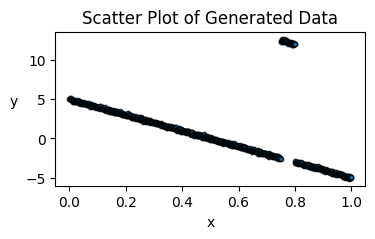

In [5]:
np.random.seed(SEED)
inputs, targets = generate_data()
fig, ax = visualize_data(inputs, targets)

In [6]:
## Don't change initial parameters
weight = 1.
bias = 0.

## 1.2 Implement Linear Regression (3 Points)
Implement a simple linear regression model using gradient descent to fit the data from the `generate_data` function. Use `numpy` only and derive all gradients manually --don't use autograd tools (PyTorch, TensorFlow, MXNet, JAX, etc.). The autograding environment will not have any autograd libraries installed.

**Model:** Your model should take the standard linear form:
$$
\hat y = f(w,b,x):= w \cdot x + b, \tag{1}
$$
where $y \in \mathbb R$ is the predicted output for the input $x \in \mathbb R$, $w \in \mathbb R$ is a scalar weight parameter, and $b \in \mathbb R$ is a bias parameter.

**Objective:** Minimize the mean squared error (MSE) between predictions and targets:
$$\mathscr{L}(w,b) = \frac 1 {2n} \sum_{i=1}^n \left(y_i-\hat y_i\right)^2\tag{MSE}$$

**Updates:** Remember our goal is to find parameters $(w^\ast, b^\ast)$ that minimize the objective function. In gradient descent we iteratively update the parameters in the direction of the negative gradient, where
$$w_t \gets w_{t-1} - \eta \nabla_{w_{t-1}} \mathscr L \tag{3}$$
$$b_t \gets b_{t-1} - \eta \nabla_{b_{t-1}} \mathscr L \tag{4}$$


**Derivatives:** You must compute:
- The intermediate gradient $\frac {\partial \mathscr{L}}{\partial \hat{y}} \tag{5}$
- Gradient of the loss with respect to the weight $w$: $\frac {\partial \mathscr{L}}{\partial w} \tag{6}$
- Gradient of the loss with respect to the bias $b$: $\frac {\partial \mathscr{L}}{\partial b} \tag{7}$

You are welcome to use any technique you want to decide when to stop training. Make sure you tune your optimization hyper-parameters so that the model converges. Print out or plot the loss over the course of training.


In [7]:
def model(weight: float, bias: float, inputs: np.array) -> np.array:
    ##########################################
    ## TODO: Implement linear model: y = weight * x + bias (Eq. 1)
    ## 0.5 pts
    ## Your Code
    res = weight * inputs + bias
    ##########################################
    return res

def loss(weight: float, bias: float, inputs: np.array, targets: np.array) -> float:
    ##########################################
    ## TODO: Implement mean squared error loss (Eq. MSE)
    ## 0.5 pts
    ## Your Code
    res = np.mean(np.square(targets - model(weight, bias, inputs))) / 2
    ##########################################
    return res

def dloss_dmodel(weight: float, bias: float, inputs: np.array, targets: np.array) -> np.array:
    ##########################################
    ## TODO: Compute the derivative of the loss function
    ## with respect to the model output (Eq. 5)
    ## 0.5 pts
    ## Your Code
    res = (model(weight, bias, inputs) - targets) / inputs.shape[0]
    ##########################################
    return res

def weight_update(weight: float, bias: float, inputs: np.array, targets: np.array) -> float:
    ##########################################
    ## TODO: Compute the update to be applied to the weights (Eq. 3)
    ## We will use this function to update the weights in `train_linear_regression` function (see below):
    # weight - learning_rate*weight_update(weight, bias, inputs, targets)
    ## 0.5 pts
    ## Your Code
    res = np.sum(dloss_dmodel(weight, bias, inputs, targets) * inputs)
    ##########################################
    return res

def bias_update(weight: float, bias: float, inputs: np.array, targets: np.array) -> float:
    ##########################################
    ## TODO: Compute the update to be applied to the bias term (Eq. 4)
    ## We will use this function to update the biases in `train_linear_regression` function (see below):
    # new_bias = bias - learning_rate*bias_update(weight, bias, inputs, targets)
    ## 0.5 pts
    ## Your Code
    res = np.sum(dloss_dmodel(weight, bias, inputs, targets))
    ##########################################
    return res

def train_linear_regression(inputs: np.array, targets: np.array, weight: float, bias: float, learning_rate: float, update_steps: int = 1000) -> Tuple[float, float, List[float]]:
    ## No need to change this function but you need to understand it
    losses = []
    for _ in range(update_steps):
        new_weight = weight - learning_rate*weight_update(weight, bias, inputs, targets)
        new_bias = bias - learning_rate*bias_update(weight, bias, inputs, targets)
        weight = new_weight
        bias = new_bias
        losses.append(loss(weight, bias, inputs, targets))
    return weight, bias, losses


### Run gradient descent & Analyze the result (0.5 points)
Print out the values of $w$ and $b$ found by your model after training and compare them to the ground truth values (which can be found inside the code of the generate_data function). Are they close? Do you achieve $< 5.2$ MSE loss with your final parameters? If not, optimize your `learning_rate` and `update_steps` hyper-parameters.


New weight after training: -6.345635951683697, new bias after training: 3.8835056649240864
Final loss: 5.157997831203671


Text(0, 0.5, 'Loss')

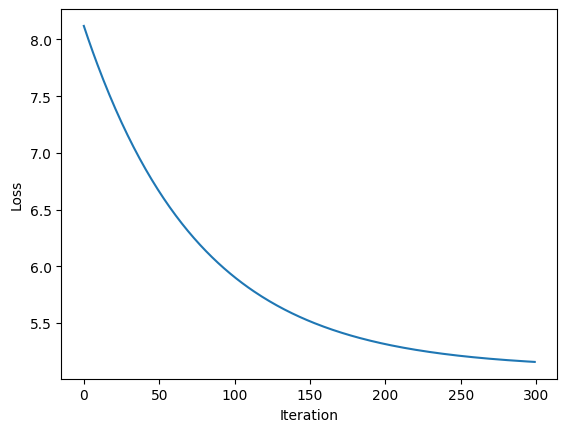

In [8]:
##########################################
## TODO: make sure to play around with different learning_rate and update_steps combinations
## so that your model achieves <5.2 MSE loss
## Make sure to update the parameters
learning_rate = 0.1
update_steps = 300
##########################################

new_weight, new_bias, losses = train_linear_regression(inputs, targets, weight, bias, learning_rate, update_steps)
print(f"New weight after training: {new_weight}, new bias after training: {new_bias}")
print(f"Final loss: {losses[-1]}")
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")

  (Not graded) Recreate the scatter plot you generated in question 1 and plot the model as a line on the same plot. What went wrong?


(<Figure size 400x200 with 1 Axes>,
 <Axes: title={'center': 'y = -6.35 x + 3.88'}>)

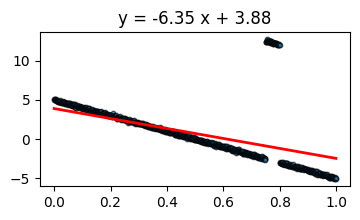

In [9]:
def plot_model_prediction(x, y):
  fig, ax = plt.subplots(figsize=(4, 2))
  ##########################################
  ## TODO: Create a scatter plot of the data
  # (0 points)
  ax.scatter(x, y, s=10, alpha=0.6, label="True data", edgecolor='k')

  ## TODO: Create a scatter plot of the predicted values
  # (0 points)
  y_pred = new_weight * x + new_bias
  ax.plot(x, y_pred, color="red", linewidth=2, label="Model prediction")

  ##########################################

  ax.set_title(f"y = {new_weight:.2f} x + {new_bias:.2f}")

  return fig, ax

plot_model_prediction(inputs,targets)

## 1.3 *Robust* Linear Regression (1 Point)
Implement a linear regression model exactly like the one you created in the previous question, except using L1 loss (absolute difference) instead of the squared L2 loss (MSE). You should be able to copy and paste your code from question 1.2 and only change a few lines. Print out or plot the loss over the course of training. What is different about the loss trajectory compared to the squared-error linear regression?

In [27]:
def robust_lr_model(weight: float, bias: float, inputs: np.array) -> np.array:
    ##########################################
    ## TODO: Implement linear model: y = weight * x + bias (Eq. 1)
    ## Hint: linear regression model
    ## Your Code, 0.05 points
    res = weight * inputs + bias
    ##########################################
    return res

def robust_lr_loss(weight: float, bias: float, inputs: np.array, targets: np.array) -> float:
    ##########################################
    ## TODO: Implement L1 loss
    ## Your Code, 0.2 points
    res = np.mean(np.abs(targets - robust_lr_model(weight, bias, inputs)))
    ##########################################
    return res

def robust_lr_dloss_dmodel(weight: float, bias: float, inputs: np.array, targets: np.array) -> np.array:
    ##########################################
    ## TODO: Implement the derivative of the L1 loss function
    ## with respect to the model output
    ## Your Code, 0.2 points
    diff = robust_lr_model(weight, bias, inputs) - targets
    grad = np.sign(diff)
    grad[diff == 0] = 0  # pick 0 for undefined subgradient
    res = grad / inputs.shape[0]
    ##########################################
    return res

def robust_lr_weight_update(weight: float, bias: float, inputs: np.array, targets: np.array) -> float:
    ##########################################
    ## TODO: Implement the update to be applied to the weights (Eq. 3)
    ## We will use this function to update the weights in `train_robust_linear_regression` function (see below):
    # new_weight = weight - learning_rate*robust_lr_weight_update(weight, bias, inputs, targets)
    ## Your Code, 0.15 points
    res = np.sum(robust_lr_dloss_dmodel(weight, bias, inputs, targets) * inputs)
    ##########################################
    return res

def robust_lr_bias_update(weight: float, bias: float, inputs: np.array, targets: np.array) -> float:
    ##########################################
    ## TODO: Implement the update to be applied to the bias term (Eq. 4)
    ## We will use this function to update the biases in `train_robust_linear_regression` function (see below):
    # new_bias = bias - learning_rate*robust_lr_bias_update(weight, bias, inputs, targets)
    ## Your Code, 0.1 points
    res = np.sum(robust_lr_dloss_dmodel(weight, bias, inputs, targets))
    ##########################################
    return res

def train_robust_linear_regression(inputs: np.array, targets: np.array, weight: float, bias: float, learning_rate: float, update_steps: int = 1000) -> Tuple[float, float, List[float]]:
    ## No need to change this function but please take time to understand it
    losses = []
    for _ in range(update_steps):
        new_weight = weight - learning_rate*robust_lr_weight_update(weight, bias, inputs, targets)
        new_bias = bias - learning_rate*robust_lr_bias_update(weight, bias, inputs, targets)
        weight = new_weight
        bias = new_bias
        losses.append(robust_lr_loss(weight, bias, inputs, targets))
    return weight, bias, losses


### Run gradient descent & Analyze the result (0.3 points)
Print out the new values of $w$ and $b$ found by your model after trainin. Are they closer to the true values used in `generate_data`? Do you achieve $< 1.5$ L1 loss with your final parameters? If not, optimize your `learning_rate` and `update_steps` hyper-parameters.

(Not graded) Plot the model as a line again. Why do you think the behavior is different?


New weight after training: -9.970788188188193, new bias after training: 4.993399999999993
Final loss: 0.8242594328394883


Text(0, 0.5, 'Loss')

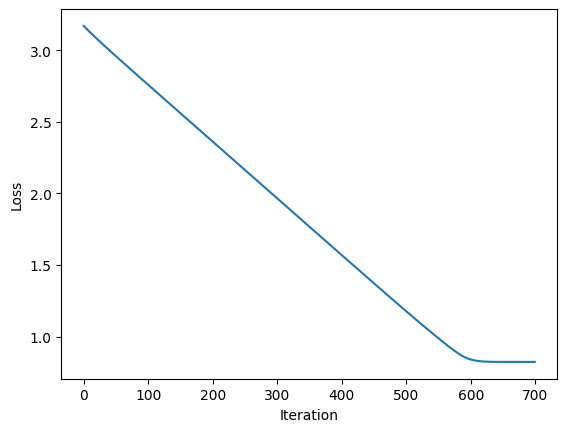

In [29]:
##########################################
## TODO: make sure to play around with different learning_rate and update_steps combinations
## so that your model achieves <1.5 L1 loss
## Make sure to update the parameters
robust_lr_learning_rate = 0.1
robust_lr_update_steps = 700
##########################################

robust_lr_new_weight, robust_lr_new_bias, robust_lr_losses = train_robust_linear_regression(inputs, targets, weight, bias, robust_lr_learning_rate, robust_lr_update_steps)
print(f"New weight after training: {robust_lr_new_weight}, new bias after training: {robust_lr_new_bias}")
print(f"Final loss: {robust_lr_loss(robust_lr_new_weight, robust_lr_new_bias, inputs, targets)}")
plt.plot(robust_lr_losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")

(<Figure size 400x200 with 1 Axes>,
 <Axes: title={'center': 'y = -9.97 x + 4.99'}>)

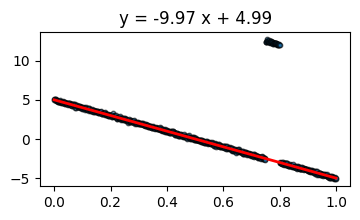

In [30]:
def plot_robust_lr_model_prediction(x, y):
  fig, ax = plt.subplots(figsize=(4, 2))
  ##########################################
  ## TODO: Create a scatter plot of the data
  # (0 points)
  ax.scatter(x, y, s=10, alpha=0.6, label="True data", edgecolor='k')

  ## TODO: Create a scatter plot of the predicted values (by the robust_lr model)
  # (0 points)
  y_pred_robust_lr = robust_lr_new_weight * x + robust_lr_new_bias
  ax.plot(x, y_pred_robust_lr, color="red", linewidth=2, label="Model prediction")

  ##########################################

  ax.set_title(f"y = {robust_lr_new_weight:.2f} x + {robust_lr_new_bias:.2f}")

  return fig, ax

plot_robust_lr_model_prediction(inputs,targets)

# 2. Implement Logistic Regression (2 Points)
In the second part of the homework, you will implement logistic regression.

## 2.1 Data Exploration

In this section observe the data given to you. You don't need to implement anything here

In [13]:
import numpy as np
from sklearn.utils import shuffle

def generate_flower_data(n_samples: int = 1000, noise: float = 0.1,
                         num_classes: int = 3, seed: int = 42):
    rand = np.random.default_rng(seed)
    t = rand.uniform(0, 2 * np.pi, n_samples)

    # Petal shape: radius varies with class count
    r = 1 + 0.3 * np.sin(num_classes * t)

    x = r * np.cos(t) + noise * rand.standard_normal(n_samples)
    y = r * np.sin(t) + noise * rand.standard_normal(n_samples)

    X = np.stack([x, y], axis=1)

    # Assign class based on petal angle region
    labels = ((t % (2 * np.pi)) / (2 * np.pi) * num_classes).astype(int)
    y = labels.reshape(-1, 1)

    return shuffle(X, y, random_state=seed)

NUM_CLASSES = 4
N_FEATURES = 2
np.random.seed(SEED)
flower_X, flower_y = generate_flower_data(num_classes=NUM_CLASSES)


(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Flower Dataset'}>)

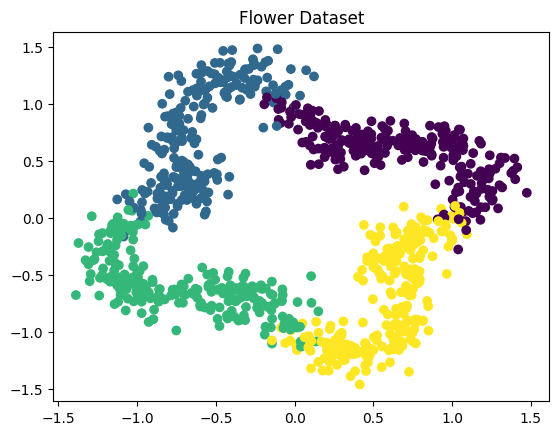

In [14]:
def visualize_classification_data(features, labels):
  fig, ax = plt.subplots()
  ax.scatter(x=features[:, 0], y=features[:, 1], c=labels, cmap="viridis")
  plt.title('Flower Dataset')
  return fig, ax

visualize_classification_data(flower_X, flower_y)

## 2.2 Implementing Logistic Regression

Implement a simple logistic regression model using gradient descent to fit the data from the `generate_flower_data` function.
Similar to linear regression, use `numpy` only and derive all gradients manually --don't use autograd tools (PyTorch, TensorFlow, MXNet, JAX, etc.).


**Model:**
In classification problems the goal is to assign each data point to one of the $k$ possible classes. As discussed in class, in logistic (softmax) regression we model this by predicting a probability distribution over $k$ classes for each sample. Given an input $x\in \mathbb R^d$, the model computes class probabilities as:
$$ \mathbf{\hat y} = \mathrm{softmax} (Wx + b) \tag{2.1}$$

The softmax function maps the output logits $\mathbf{o}=Wx+b \in \mathbb R^k$ to a valid probability distribution:

$$ \mathrm{softmax}(\mathbf{o})_y = \frac{\exp(o_y)}{\sum_{j=1}^k \exp(o_j)} , \tag{2.2}$$

where
- $\mathbf{\hat y}\in\mathbb{R}^k$ is the predicted class probabilities
- $W\in \mathbb{R}^{k\times d}$ is the weight matrix
- $b\in\mathbb{R}^k$ is the bias vector
- $k$ is the number of classes

Remember the softmax function ensures that the model outputs a probability distribution (values in $[0, 1]$ and sum up to 1).

1. **Implement the softmax function.**

Given a vector of logits $\mathbf{o}\in \mathbb R^k$, compute the softmax output as in (2.2).


**Objective:** Minimize the cross-entropy loss between predictions and *one-hot encoded* targets
$$\mathscr{L}(W,b) = -\frac 1 {n} \sum_{i=1}^n \sum_{j=1}^k y_{ij} \log (\hat y_{ij}), \tag{CE}$$
where $y\in\mathbb R ^{n\times k}$ is the one-hot encoded label matrix, and $\hat y\in\mathbb R^{n\times k}$ are the predicted probabilities.

2. **Implement the cross-entropy loss**
Write a function that computes the cross-entropy loss (CE) given predicted probabilities and one-hot encoded labels.


**Updates:** Remember our goal is to find parameters $(W^\ast, b^\ast)$ that minimize the objective function.
In gradient descent we iteratively update the parameters in the direction of the negative gradient, where
$$w_t \gets W_{t-1} - \eta \nabla_{W_{t-1}} \mathscr L \tag{2.3}$$
$$b_t \gets b_{t-1} - \eta \nabla_{b_{t-1}} \mathscr L \tag{2.4}$$


**Derivatives:** You must compute:
- The intermediate gradient $\frac {\partial \mathscr{L}}{\partial \mathbf{o}} \tag{2.5}$
- Gradient of the loss with respect to the weight matrix $W$: $\frac {\partial \mathscr{L}}{\partial W} \tag{2.6}$
- Gradient of the loss with respect to the bias $b$: $\frac {\partial \mathscr{L}}{\partial b} \tag{2.7}$


You are welcome to use any technique you want to decide when to stop training. Make sure you tune your optimization hyper-parameters so that the model converges. Print out or plot the loss over the course of training.


### Implement Softmax

In [15]:
def softmax(logits: np.array) -> np.array:
    ##########################################
    ## TODO: Implement softmax function
    ## Your Code, 0.3 points
    ## Hint: Pass keepdims=True
    res = np.exp(logits) / np.sum(np.exp(logits), axis=1, keepdims=True)
    ##########################################
    # Hint: Remember softmax outputs a vector with same dimensions as the logits
    assert logits.shape == res.shape
    return res


def logistic_reg_model(weight: np.ndarray, bias:np.ndarray, inputs: np.ndarray) -> np.ndarray:
    ##########################################
    ## TODO: Implement linear model with softmax: y = softmax(X W^T + b)  (Eq 2.1)
    ## Your Code, 0.2 points
    logits = inputs @ weight.T + bias
    probs = softmax(logits)
    ##########################################
    assert probs.shape == (inputs.shape[0], weight.shape[0])
    return probs

def cross_entropy_loss(predicted_probs: np.array, targets: np.array) -> float:
    n, c = predicted_probs.shape
    ## Hint: You can add a small ofset for numerical stability
    eps = 1e-7
    assert predicted_probs.shape == targets.shape
    np.testing.assert_allclose(np.sum(predicted_probs, axis=1), 1, rtol=1e-5)
    ##########################################
    ## TODO: Implement cross entropy loss, 0.3 points

    loss = float(-np.sum(targets * np.log(predicted_probs + eps)) / n)
    ##########################################
    assert isinstance(loss, float), "CE should return a scalar value."
    return loss


def dloss_dlogits(predicted_probs: np.ndarray, targets: np.ndarray) -> np.ndarray:
    ##########################################
    ## TODO: Implement derivative of CE loss w.r.t logits (Eq. 2.5)
    ## 0.2 pts
    ## Your Code
    grad = (predicted_probs - targets) / predicted_probs.shape[0]
    ##########################################
    assert grad.shape == predicted_probs.shape
    return grad


def logistic_reg_weight_update(predicted_probs: np.ndarray, inputs: np.ndarray, targets: np.ndarray) -> np.ndarray:
    ##########################################
    ## TODO: Gradient of loss w.r.t W (Eq. 2.6)
    ## We will use this function to update the weights in `train_logistic_regression` function (see below):
    # dW = logistic_reg_weight_update(predicted_probs, inputs, targets)
    # weight = weight - learning_rate * dW
    ## Hint: you can reuse `dloss_dlogits`
    ## 0.3 pts
    ## Your Code
    dW = dloss_dlogits(predicted_probs, targets).T @ inputs
    ##########################################
    return dW


def logistic_reg_bias_update(predicted_probs: np.ndarray, inputs: np.ndarray, targets: np.ndarray) -> np.ndarray:
    ##########################################
    ## TODO: Gradient of loss w.r.t b (Eq. 2.7)
    ## We will use this function to update the biases in `train_logistic_regression` function (see below):
    # db = logistic_reg_bias_update(predicted_probs, inputs, targets)
    # bias = bias - learning_rate * db
    ## Hint: you can reuse `dloss_dlogits`
    ## 0.2 pts
    ## Your Code
    db = np.sum(dloss_dlogits(predicted_probs, targets), axis=0)
    ##########################################
    return db

In [16]:
def train_logistic_regression(inputs: np.array, targets: np.array,
                              weight: np.ndarray,
                              bias: np.ndarray,
                              learning_rate: float,
                              update_steps: int = 1000) -> Tuple[np.ndarray, np.ndarray, List[float]]:
    ## No need to change this function but please take time to understand it
    # Make sure targets are one-hot encoded: # X ∈ ℝ^{n×d}, y ∈ one-hot ℝ^{n×k}
    from sklearn.preprocessing import OneHotEncoder
    targets = OneHotEncoder().fit_transform(targets).toarray()
    losses = []
    for _ in range(update_steps):
        # Forward pass
        predicted_probs = logistic_reg_model(weight, bias, inputs)
        # Compute gradients
        dW = logistic_reg_weight_update(predicted_probs, inputs, targets)
        assert dW.shape == weight.shape
        db = logistic_reg_bias_update(predicted_probs, inputs, targets)
        assert db.shape ==  bias.shape

        # Parameter updates
        weight = weight - learning_rate * dW
        bias = bias - learning_rate * db

        # Track loss
        losses.append(cross_entropy_loss(predicted_probs, targets))
    return weight, bias, losses



### Run gradient descent & Analyze the result (0.5 points)
Do you achieve $< 0.2$ CE loss with your final parameters? If not, optimize your `learning_rate` and `update_steps` hyper-parameters.


Final loss: 0.18783481782765668


Text(0, 0.5, 'Loss')

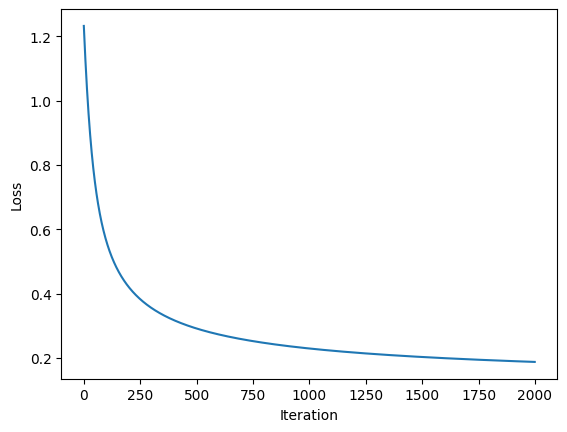

In [25]:
##########################################
## TODO: make sure to play around with different learning_rate and update_steps combinations
## so that your model achieves <0.2 CE loss
## Make sure to update the parameters
log_learning_rate = 0.1
log_update_steps = 2000
##########################################

np.random.seed(SEED)
log_weight = np.random.randn(NUM_CLASSES, N_FEATURES) * np.sqrt(1.0 / N_FEATURES)
log_bias = np.zeros(NUM_CLASSES)

new_log_weight, new_log_bias, losses = train_logistic_regression(flower_X, flower_y, log_weight, log_bias, log_learning_rate, log_update_steps)
print(f"Final loss: {losses[-1]}")
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")

(not graded)

Plot the predictions using the given function and comment on which samples model gets wrong.

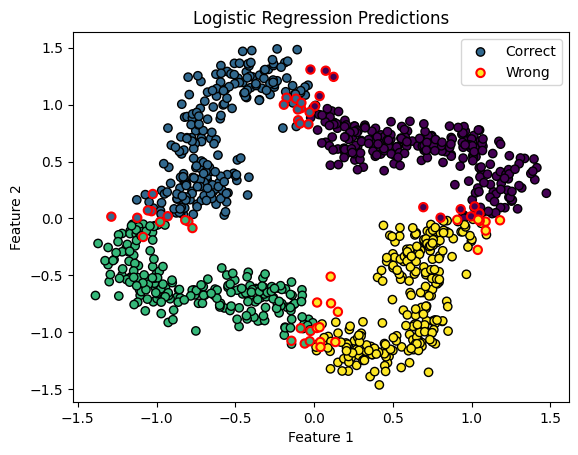

In [26]:
def plot_predictions(inputs: np.ndarray, targets: np.ndarray, weight: np.ndarray, bias: np.ndarray):
  y_pred = np.argmax(logistic_reg_model(weight, bias, inputs), axis=1, keepdims=True)

  fig, ax = plt.subplots()
  correct_mask = (y_pred == targets).flatten()
  ax.scatter(inputs[correct_mask, 0], inputs[correct_mask, 1], c=y_pred[correct_mask], cmap="viridis", edgecolors="k", label="Correct")
  ax.scatter(
        inputs[~correct_mask, 0], inputs[~correct_mask, 1],
        c=y_pred[~correct_mask], cmap="viridis",
        edgecolors="red", linewidths=1.5, label="Wrong"
    )

  ax.set_title("Logistic Regression Predictions")
  ax.set_xlabel("Feature 1")
  ax.set_ylabel("Feature 2")
  ax.legend()
  plt.show()


plot_predictions(flower_X, flower_y, new_log_weight, new_log_bias)

# Collaboration / External Help
Disclose any help you used (LLM usage, blogs, search, Github links, etc) and collaborations with your classmates. If you  completed the homework on your own, you can leave this part empty.

> Collaborated with ChatGPT